In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
flight = pd.read_excel(r'Data_Train.xlsx')

# EDA

In [3]:
flight

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
flight.shape

(10683, 11)

In [5]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


### From the information we can observe that all variables except price showing object type.infact 'data_of_journey','Dep_time','Arrival_time' are date type.so, in the next step i'm going to convert data type the variables.

In [6]:
#Date of journey,Dep_time and Arrival_time are represented as Object type.so,we need to change data type
def change_into_datetime(col):
    flight[col]=pd.to_datetime(flight[col])

In [7]:
for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    change_into_datetime(i)

In [8]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  datetime64[ns]
 6   Arrival_Time     10683 non-null  datetime64[ns]
 7   Duration         10683 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 918.2+ KB


In [9]:
flight.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [10]:
flight['day_of_journey'] = flight['Date_of_Journey'].dt.day
flight['month_of_journey'] = flight['Date_of_Journey'].dt.month

In [11]:
flight

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-06-16 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-06-16 05:50:00,2022-06-16 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2022-06-16 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2022-06-16 18:05:00,2022-06-16 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2022-06-16 16:50:00,2022-06-16 21:35:00,4h 45m,1 stop,No info,13302,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,2022-06-16 19:55:00,2022-06-16 22:25:00,2h 30m,non-stop,No info,4107,4,9
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2022-06-16 20:45:00,2022-06-16 23:20:00,2h 35m,non-stop,No info,4145,27,4
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,2022-06-16 08:20:00,2022-06-16 11:20:00,3h,non-stop,No info,7229,27,4
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,2022-06-16 11:30:00,2022-06-16 14:10:00,2h 40m,non-stop,No info,12648,3,1


In [12]:
#dropping unnecessary columns from dataset
flight.drop(columns=['Date_of_Journey','Additional_Info'],axis=1,inplace=True)
flight

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,day_of_journey,month_of_journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-06-16 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-06-16 05:50:00,2022-06-16 13:15:00,7h 25m,2 stops,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2022-06-16 09:25:00,2022-06-10 04:25:00,19h,2 stops,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2022-06-16 18:05:00,2022-06-16 23:30:00,5h 25m,1 stop,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2022-06-16 16:50:00,2022-06-16 21:35:00,4h 45m,1 stop,13302,3,1
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2022-06-16 19:55:00,2022-06-16 22:25:00,2h 30m,non-stop,4107,4,9
10679,Air India,Kolkata,Banglore,CCU → BLR,2022-06-16 20:45:00,2022-06-16 23:20:00,2h 35m,non-stop,4145,27,4
10680,Jet Airways,Banglore,Delhi,BLR → DEL,2022-06-16 08:20:00,2022-06-16 11:20:00,3h,non-stop,7229,27,4
10681,Vistara,Banglore,New Delhi,BLR → DEL,2022-06-16 11:30:00,2022-06-16 14:10:00,2h 40m,non-stop,12648,3,1


In [13]:
flight.isnull().sum()

Airline             0
Source              0
Destination         0
Route               1
Dep_Time            0
Arrival_Time        0
Duration            0
Total_Stops         1
Price               0
day_of_journey      0
month_of_journey    0
dtype: int64

In [14]:
flight.dropna(inplace=True)

In [15]:
flight.shape

(10682, 11)

In [16]:
flight.isnull().sum()

Airline             0
Source              0
Destination         0
Route               0
Dep_Time            0
Arrival_Time        0
Duration            0
Total_Stops         0
Price               0
day_of_journey      0
month_of_journey    0
dtype: int64

In [17]:
#drop the duplicate values
flight.drop_duplicates(inplace=True,keep='first')

In [18]:
flight.shape

(10462, 11)

### Before dropping duplicates shape of the dataset is (10682 rows *  11columns ) after dropping duplicates from dataset shape of the dataset is  (10462 rows * 11 columns)

### Visualization


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

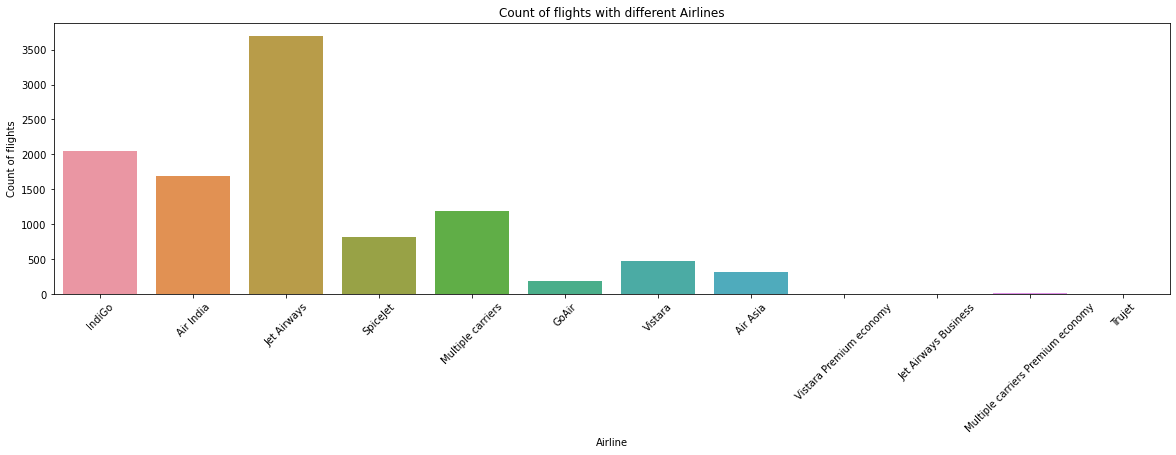

In [19]:
plt.figure(figsize = (20,5))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'Airline', data =flight)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 45)

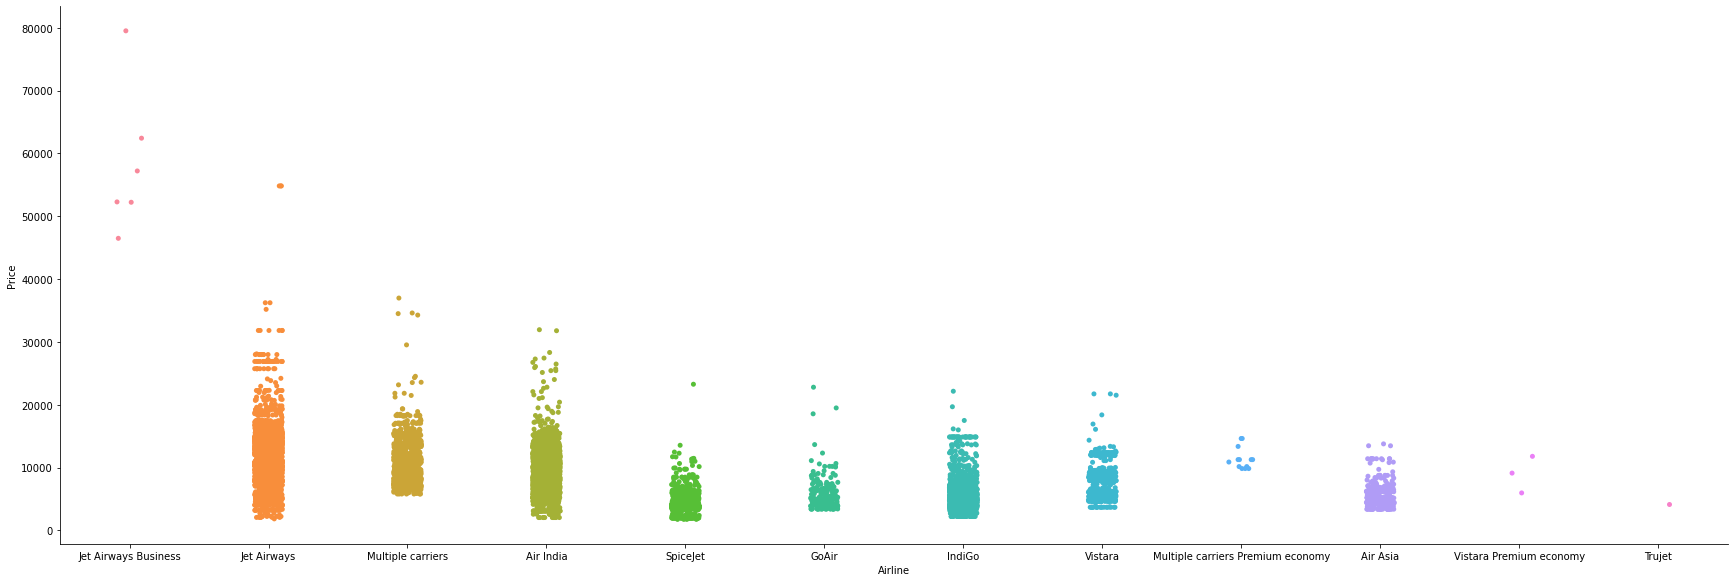

In [20]:
#Price VS Airline
sns.catplot(y = "Price", x = "Airline", data = flight.sort_values("Price", ascending = False), height = 8, aspect = 3)
plt.show()

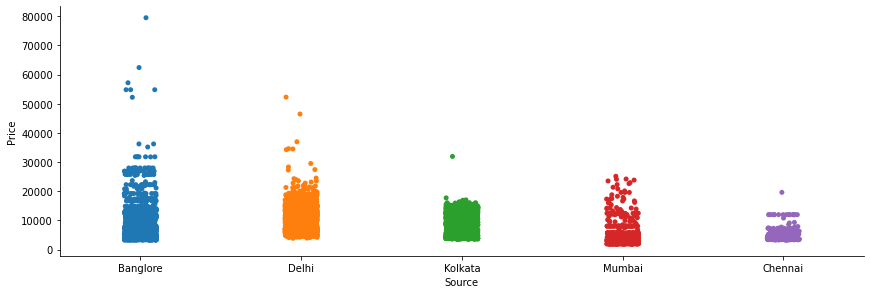

In [21]:
# Price Vs Source
sns.catplot(y = "Price", x = "Source", data = flight.sort_values("Price", ascending = False),height = 4, aspect = 3)
plt.show()

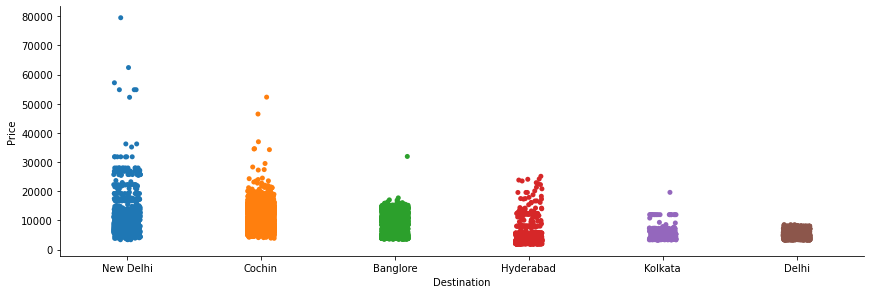

In [22]:
#Price Vs Destination
sns.catplot(y = "Price", x = "Destination", data = flight.sort_values("Price", ascending = False),height = 4, aspect = 3)
plt.show()

In [23]:
#Now we will exctract hour and minites using functions

def extract_hour(data,col):
    data[col+'_hour']=data[col].dt.hour
    
def extract_min(data,col):
    data[col+'_min']=data[col].dt.minute
    

def drop_col(data,col):
    data.drop(col,axis=1,inplace=True)


In [24]:
# Similar to Date_of_Journey we can extract values from Dep_Time
extract_hour(flight,'Dep_Time')

#extracting minutes
extract_min(flight,'Dep_Time')

#drop the column
drop_col(flight,'Dep_Time')

In [25]:
#extracting hour
extract_hour(flight,'Arrival_Time')

#extracting min
extract_min(flight,'Arrival_Time')


#drop the column
drop_col(flight,'Arrival_Time')

In [26]:
flight

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,day_of_journey,month_of_journey,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,13302,3,1,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,4107,4,9,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,4145,27,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,non-stop,7229,27,4,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,12648,3,1,11,30,14,10


In [27]:
#duration

duration=list(flight['Duration'])

for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]: 
             duration[i]=duration[i] + ' 0m' 
        else:
             duration[i]='0h '+ duration[i]

In [28]:
flight['Duration'] = duration

In [29]:
def hour(x):
    return x.split(' ')[0][0:-1]

def minutes(x):
    return x.split(' ')[1][0:-1]

In [30]:
flight['dur_hour']= flight['Duration'].apply(hour)
flight['dur_min']= flight['Duration'].apply(minutes)


In [31]:
flight.head(4)

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,day_of_journey,month_of_journey,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,6218,5,12,18,5,23,30,5,25


In [32]:
flight.drop(columns=['Duration'],axis=1,inplace=True)

In [33]:
flight.head(3)

,Airline,Source,Destination,Route,Total_Stops,Price,day_of_journey,month_of_journey,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,13882,6,9,9,25,4,25,19,0


In [34]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            10462 non-null  object
 1   Source             10462 non-null  object
 2   Destination        10462 non-null  object
 3   Route              10462 non-null  object
 4   Total_Stops        10462 non-null  object
 5   Price              10462 non-null  int64 
 6   day_of_journey     10462 non-null  int64 
 7   month_of_journey   10462 non-null  int64 
 8   Dep_Time_hour      10462 non-null  int64 
 9   Dep_Time_min       10462 non-null  int64 
 10  Arrival_Time_hour  10462 non-null  int64 
 11  Arrival_Time_min   10462 non-null  int64 
 12  dur_hour           10462 non-null  object
 13  dur_min            10462 non-null  object
dtypes: int64(7), object(7)
memory usage: 1.4+ MB


In [35]:
flight['dur_hour'] = flight['dur_hour'].astype(int)
flight['dur_min'] = flight['dur_min'].astype(int)

In [36]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            10462 non-null  object
 1   Source             10462 non-null  object
 2   Destination        10462 non-null  object
 3   Route              10462 non-null  object
 4   Total_Stops        10462 non-null  object
 5   Price              10462 non-null  int64 
 6   day_of_journey     10462 non-null  int64 
 7   month_of_journey   10462 non-null  int64 
 8   Dep_Time_hour      10462 non-null  int64 
 9   Dep_Time_min       10462 non-null  int64 
 10  Arrival_Time_hour  10462 non-null  int64 
 11  Arrival_Time_min   10462 non-null  int64 
 12  dur_hour           10462 non-null  int32 
 13  dur_min            10462 non-null  int32 
dtypes: int32(2), int64(7), object(5)
memory usage: 1.4+ MB


In [37]:
#finding the categorical values

col = []
for column in flight.columns:
    if flight[column].dtype=='object':
        col.append(column)
col    

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops']

In [38]:
#finding the continues data
cont = []
for column in flight.columns:
    if flight[column].dtype !='object':
        cont.append(column)
cont


['Price',
 'day_of_journey',
 'month_of_journey',
 'Dep_Time_hour',
 'Dep_Time_min',
 'Arrival_Time_hour',
 'Arrival_Time_min',
 'dur_hour',
 'dur_min']

In [39]:
# Handling categorical data
categorical = flight[col]
categorical

,Airline,Source,Destination,Route,Total_Stops
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop
...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop


In [40]:
categorical['Airline'].value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [41]:
categorical['Route'].value_counts()

DEL → BOM → COK                2376
BLR → DEL                      1536
CCU → BOM → BLR                 979
CCU → BLR                       724
BOM → HYD                       621
                               ... 
BLR → HBX → BOM → NAG → DEL       1
BLR → BOM → IXC → DEL             1
CCU → RPR → HYD → BLR             1
BOM → GOI → HYD                   1
BOM → DED → DEL → HYD             1
Name: Route, Length: 128, dtype: int64

In [42]:
categorical['Route1']=categorical['Route'].str.split('→').str[0]
categorical['Route2']=categorical['Route'].str.split('→').str[1]
categorical['Route3']=categorical['Route'].str.split('→').str[2]
categorical['Route4']=categorical['Route'].str.split('→').str[3]
categorical['Route5']=categorical['Route'].str.split('→').str[4]

In [43]:
categorical.drop('Route',axis=1,inplace=True)
categorical.head()

,Airline,Source,Destination,Total_Stops,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,non-stop,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,2 stops,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,2 stops,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,1 stop,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,1 stop,BLR,NAG,DEL,NaN,NaN


In [44]:
categorical.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Route1             0
Route2             0
Route3          3475
Route4          9100
Route5         10418
dtype: int64

In [45]:
for i in ['Route3', 'Route4', 'Route5']:
    categorical[i].fillna('None',inplace=True)

In [46]:
categorical.isnull().sum()

Airline        0
Source         0
Destination    0
Total_Stops    0
Route1         0
Route2         0
Route3         0
Route4         0
Route5         0
dtype: int64

In [47]:
# Applying label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in ['Route1', 'Route2', 'Route3', 'Route4', 'Route5']:
    categorical[i]=le.fit_transform(categorical[i])
categorical

,Airline,Source,Destination,Total_Stops,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,non-stop,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,0,34,8,13,5
...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,2,5,29,13,5
10679,Air India,Kolkata,Banglore,non-stop,2,5,29,13,5
10680,Jet Airways,Banglore,Delhi,non-stop,0,13,29,13,5
10681,Vistara,Banglore,New Delhi,non-stop,0,13,29,13,5


In [48]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Route1', 'Route2',
       'Route3', 'Route4', 'Route5'],
      dtype='object')

In [49]:
#Next we will look at 'Total_Stops'
categorical['Total_Stops'].value_counts()


1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: Total_Stops, dtype: int64

In [50]:
#LabelEncoding
categorical['Total_Stops'] = le.fit_transform(categorical['Total_Stops'])
categorical['Total_Stops']

0        4
1        1
2        1
3        0
4        0
        ..
10678    4
10679    4
10680    4
10681    4
10682    1
Name: Total_Stops, Length: 10462, dtype: int32

In [51]:
categorical.head(4)

,Airline,Source,Destination,Total_Stops,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,4,0,13,29,13,5
1,Air India,Kolkata,Banglore,1,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,1,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,0,2,34,3,13,5


In [52]:
#LabelEncoding
categorical['Airline'] = le.fit_transform(categorical['Airline'])
categorical['Source'] = le.fit_transform(categorical['Source'])
categorical['Destination'] = le.fit_transform(categorical['Destination'])


In [53]:
categorical.head(4)

,Airline,Source,Destination,Total_Stops,Route1,Route2,Route3,Route4,Route5
0,3,0,5,4,0,13,29,13,5
1,1,3,0,1,2,25,1,3,5
2,4,2,1,1,3,32,4,5,5
3,3,3,0,0,2,34,3,13,5


In [54]:
#concatinate the categorical and continuoes variable
flight_f = pd.concat([categorical,flight[cont]],axis=1)
flight_f

,Airline,Source,Destination,Total_Stops,Route1,Route2,Route3,Route4,Route5,Price,day_of_journey,month_of_journey,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,3,0,5,4,0,13,29,13,5,3897,24,3,22,20,1,10,2,50
1,1,3,0,1,2,25,1,3,5,7662,5,1,5,50,13,15,7,25
2,4,2,1,1,3,32,4,5,5,13882,6,9,9,25,4,25,19,0
3,3,3,0,0,2,34,3,13,5,6218,5,12,18,5,23,30,5,25
4,3,0,5,0,0,34,8,13,5,13302,3,1,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,4,2,5,29,13,5,4107,4,9,19,55,22,25,2,30
10679,1,3,0,4,2,5,29,13,5,4145,27,4,20,45,23,20,2,35
10680,4,0,2,4,0,13,29,13,5,7229,27,4,8,20,11,20,3,0
10681,10,0,5,4,0,13,29,13,5,12648,3,1,11,30,14,10,2,40


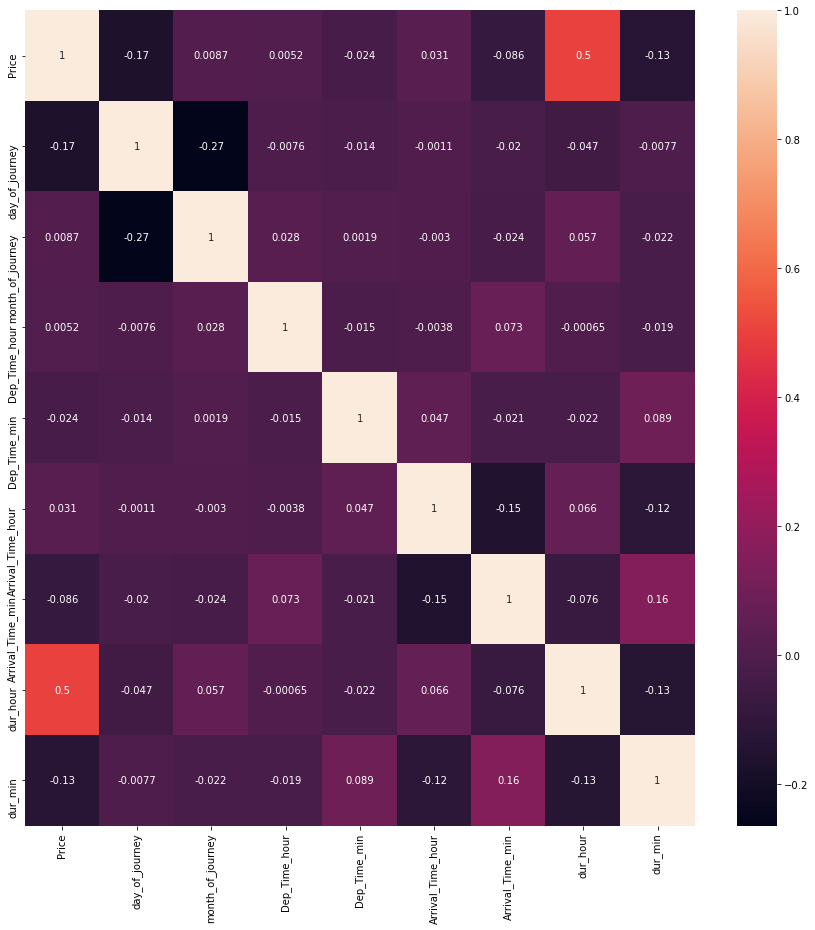

In [55]:
#correlation matrics for train data
plt.figure(figsize = (15,15))
sns.heatmap(flight.corr(), annot = True)
plt.show()

## Data scaling

In [56]:
flight_f.head()

,Airline,Source,Destination,Total_Stops,Route1,Route2,Route3,Route4,Route5,Price,day_of_journey,month_of_journey,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,3,0,5,4,0,13,29,13,5,3897,24,3,22,20,1,10,2,50
1,1,3,0,1,2,25,1,3,5,7662,5,1,5,50,13,15,7,25
2,4,2,1,1,3,32,4,5,5,13882,6,9,9,25,4,25,19,0
3,3,3,0,0,2,34,3,13,5,6218,5,12,18,5,23,30,5,25
4,3,0,5,0,0,34,8,13,5,13302,3,1,16,50,21,35,4,45


In [57]:
x = flight_f.drop('Price',axis=1)
x

,Airline,Source,Destination,Total_Stops,Route1,Route2,Route3,Route4,Route5,day_of_journey,month_of_journey,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,3,0,5,4,0,13,29,13,5,24,3,22,20,1,10,2,50
1,1,3,0,1,2,25,1,3,5,5,1,5,50,13,15,7,25
2,4,2,1,1,3,32,4,5,5,6,9,9,25,4,25,19,0
3,3,3,0,0,2,34,3,13,5,5,12,18,5,23,30,5,25
4,3,0,5,0,0,34,8,13,5,3,1,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,4,2,5,29,13,5,4,9,19,55,22,25,2,30
10679,1,3,0,4,2,5,29,13,5,27,4,20,45,23,20,2,35
10680,4,0,2,4,0,13,29,13,5,27,4,8,20,11,20,3,0
10681,10,0,5,4,0,13,29,13,5,3,1,11,30,14,10,2,40


In [58]:
y = flight_f['Price']

In [59]:
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10462, dtype: int64

In [60]:
from sklearn.preprocessing import MinMaxScaler

mms =MinMaxScaler()
x_scaled = mms.fit_transform(x)
x_scaled

array([[0.27272727, 0.        , 1.        , ..., 0.18181818, 0.04255319,
        0.90909091],
       [0.09090909, 0.75      , 0.        , ..., 0.27272727, 0.14893617,
        0.45454545],
       [0.36363636, 0.5       , 0.2       , ..., 0.45454545, 0.40425532,
        0.        ],
       ...,
       [0.36363636, 0.        , 0.4       , ..., 0.36363636, 0.06382979,
        0.        ],
       [0.90909091, 0.        , 1.        , ..., 0.18181818, 0.04255319,
        0.72727273],
       [0.09090909, 0.5       , 0.2       , ..., 0.27272727, 0.17021277,
        0.36363636]])

In [62]:
#variable inflation factor

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['feature'] = x.columns

vif

,vif,feature
0,4.221252,Airline
1,6.236051,Source
2,3.800030,Destination
3,35.370476,Total_Stops
4,6.291586,Route1
5,3.598482,Route2
6,54.989505,Route3
7,34.918983,Route4
8,78.271412,Route5
9,2.418574,day_of_journey


In [63]:
x_scaled

array([[0.27272727, 0.        , 1.        , ..., 0.18181818, 0.04255319,
        0.90909091],
       [0.09090909, 0.75      , 0.        , ..., 0.27272727, 0.14893617,
        0.45454545],
       [0.36363636, 0.5       , 0.2       , ..., 0.45454545, 0.40425532,
        0.        ],
       ...,
       [0.36363636, 0.        , 0.4       , ..., 0.36363636, 0.06382979,
        0.        ],
       [0.90909091, 0.        , 1.        , ..., 0.18181818, 0.04255319,
        0.72727273],
       [0.09090909, 0.5       , 0.2       , ..., 0.27272727, 0.17021277,
        0.36363636]])

In [64]:
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,cross_val_score

x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2)

In [65]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV,LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [66]:
#RandomForest Regressor
rf = RandomForestRegressor(criterion = 'mse',max_features='log2')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_r = rf.predict(x_test)

rfs = r2_score(y_test,pred_r)
print('R2score',rfs*100)
print('\n')
print("Mean_absolute_error:",mean_absolute_error(y_test,pred_r))
print("mean_squared_error",mean_squared_error(y_test,pred_r))
print('RMSE:\n', np.sqrt(mean_squared_error(y_test, pred_r)))

cv_score  = cross_val_score(rf,x,y,cv=10)
cv_mean = cv_score.mean()
print("CrossValidation Score:",cv_mean)

R2score 80.02232583306875


Mean_absolute_error: 1252.792748757971
mean_squared_error 4087109.465138989
RMSE:
 2021.6600765556482
CrossValidation Score: 0.8046109378532875


In [67]:
#LinearRegression 
lr = LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
pred_lr = lr.predict(x_test)

rfs = r2_score(y_test,pred_lr)
print('R2score',rfs*100)
print('\n')
print("Mean_absolute_error:",mean_absolute_error(y_test,pred_lr))
print("mean_squared_error",mean_squared_error(y_test,pred_lr))
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred_lr)))

cv_score  = cross_val_score(lr,x,y,cv=10)
cv_mean = cv_score.mean()
print("\n CrossValidation Score:",cv_mean)

R2score 48.404303773265724


Mean_absolute_error: 2363.390090236216
mean_squared_error 10555646.100074235
RMSE: 3248.9453827471825

 CrossValidation Score: 0.48851073285592894


In [68]:
#DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
pred_dt = dt.predict(x_test)

rfs = r2_score(y_test,pred_dt)
print('R2score',rfs*100)
print('\n')
print("Mean_absolute_error:",mean_absolute_error(y_test,pred_dt))
print("mean_squared_error",mean_squared_error(y_test,pred_dt))
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred_dt)))

cv_score  = cross_val_score(dt,x,y,cv=10)
cv_mean = cv_score.mean()
print("\nCrossValidation Score:",cv_mean)

R2score 70.5872039549497


Mean_absolute_error: 1333.7606943780856
mean_squared_error 6017383.010026013
RMSE: 2453.0354685625753

CrossValidation Score: 0.67939569483381


### Accuracy Score for RandomForestRegressor is:80.02% and crossvalidation_Score:80.04%
### Accuracy Score for LinearRegression is: 48.4% and crossvalidation_Score:48.8%
### Accuracy Score for DecisionTreeRegressor is:70% and crossvalidation_Score:67%
### I will go for RandomForestRegressor.Because it giving me the best result compared to the remaining 

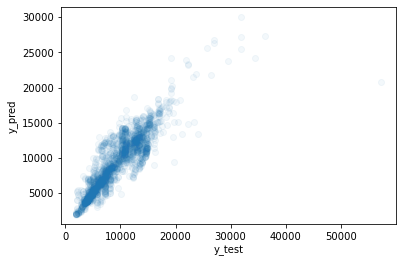

In [69]:
plt.scatter(y_test, pred_r, alpha = 0.05)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [70]:
#saving the model
import joblib
joblib.dump(rf,"flight_price_fliprobo.pkl")

['flight_price_fliprobo.pkl']